In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import sqrt

In [2]:
random.seed(0)

In [3]:
faithful = pd.read_csv('faithful.csv')
data = faithful.to_numpy()

In [4]:
def init_centers(data, k):
    """
    """
    centers = np.zeros((k, np.shape(data)[1]))
    for i in range(0, k):
        dist = np.random.uniform(size=np.shape(data)[1])
        centers[i, :] = np.min(data, axis=0) + (np.max(data, axis=0) - np.min(data, axis=0)) * dist
    return centers

In [5]:
def compute_distance(data, centers):
    """
    """
    distance = np.zeros((np.shape(data)[0], np.shape(centers)[0]))
    for i in range(0, np.shape(data)[0]):
        for j in range(0, np.shape(centers)[0]):
            distance[i, j] = sqrt(np.sum(np.square(data[i, :] - centers[j, :])))
    return distance

In [6]:
def compute_clusters(distance):
    """
    """
    clusters = np.zeros(np.shape(distance)[0])
    objective = 0.0
    for i in range(0, np.shape(distance)[0]):
        best = np.argmin(distance[i, :])
        clusters[i] = best
        objective = objective + distance[i, best]
    objective = objective / np.shape(distance)[0]
    return (clusters, objective)

In [7]:
def compute_centers(data, clusters):
    """
    """
    indices = np.unique(clusters)
    centers = np.zeros((np.shape(indices)[0], np.shape(data)[1]))
    for i in range(0, np.shape(indices)[0]):
        subdata = data[clusters == indices[i], :]
        centers[i, :] = np.mean(subdata, axis=0)
    return centers

In [8]:
def kmeans(data, k):
    """
    """
    centers = init_centers(data, k)
    objective_old = sqrt(np.sum(np.sqrt(np.max(data, axis=0) - np.min(data, axis=0))))
    clusters_old = np.zeros(np.shape(data)[0])
    stop_alg = False
    while stop_alg == False:
        distance = compute_distance(data, centers)
        (clusters_new, objective_new) = compute_clusters(distance)
        if objective_new >= objective_old:
            return (clusters_old, objective_old)
        else:
            centers = compute_centers(data, clusters_new)
            objective_old = objective_new
            clusters_old = clusters_new

In [9]:
def repeat_kmeans(data, k, N):
    """
    """
    objective = np.zeros(N)
    clusters = np.zeros((N, np.shape(data)[0]))
    for i in range(0, N):
        result = kmeans(data, k)
        clusters[i, :] = result[0]
        objective[i] = result[1]
    best = np.argmin(objective)
    return (objective[best], clusters[best, :])

In [10]:
k = 4
N = 100
(objective, clusters) = repeat_kmeans(data, k, N)

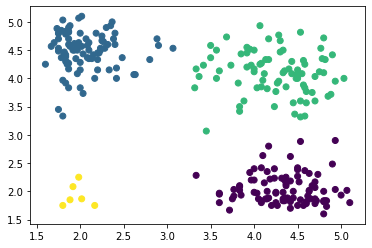

In [11]:
plt.scatter(data[:,0], data[:,1], c=clusters)